# Phishing Detection

As each coin has two sides, so does technology. On one hand, with the advancement in technology the lives are getting better, on the other hand, the ill use of technology is also increasing. The suspicious activities are increasing ranging from dos attacks, phishing, hacking etc. In this hackathon, we are concerned with the increasing phishing attacks.


Typically, Phishing is a type of social engineering where an attacker sends a fraudulent (e.g., spoofed, fake, or otherwise deceptive) message designed to trick a person into revealing sensitive information to the attacker or to deploy malicious software on the victim's infrastructure like ransomware.


**Task:**

The candidates have to read the data and create a model based on the data analysis to identify if the website is legitimate or a phishing website. The Result will be determined by the two values [1, -1] where 1 represent the legitimate and -1 represents phishing


**Data Description:**

The data set consists of 30 features of a phishing website. The value of attributes can be [1, 0, -1] except the key value which is incremental.

*  1 represents the legitimate
*  0 represents suspicious
* -1 represents phishing

## Submission
1. Output file generated by the model.
2. Source Code file or .ipynb file or Report
3. Report or Presentation with model explanation
4. Demonstration Video (If Possible)

## Evaluation Metric
- Correctness of code / Score Received
- Source or .ipynb file Submitted
- Report or Presentation with model explanation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,SGDClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
import xgboost
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
#import pandas_profiling as pp
import sweetviz as eda
from pycm import ConfusionMatrix
import math
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\Harshitta\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
dtrain = pd.read_csv('Phising_Training_Dataset.csv')
dtrain.head(3)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1


In [3]:
dtest = pd.read_csv('Phising_Testing_Dataset.csv')
dtest.head(3)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1


In [4]:
dsub = pd.read_csv('sample_submission.csv')
dsub.head(3)

,key,Result
0,21338,-1
1,21339,1
2,21340,1


In [6]:
dtrain.dtypes

key                            int64
having_IP                      int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
P

In [7]:
dtrain.shape

(8955, 32)

In [27]:
dtest.shape

(2100, 31)

In [28]:
dtrain.columns

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [29]:
dtest.columns

Index(['key', 'having_IP', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

In [8]:
dtrain.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,...,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,...,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,...,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### No null values in training & testing datasets

In [9]:
dtrain.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [10]:
dtest.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [11]:
dtrain['Abnormal_URL'].value_counts()

 1    7622
-1    1333
Name: Abnormal_URL, dtype: int64

In [12]:
dtrain['Result'].value_counts()

 1    5034
-1    3921
Name: Result, dtype: int64

In [13]:
dtrain['key'].value_counts()

12344    1
18316    1
18310    1
18311    1
18312    1
        ..
15323    1
15322    1
15321    1
15320    1
21298    1
Name: key, Length: 8955, dtype: int64

                                             |     | [  0%]   00:00 -> (? left)


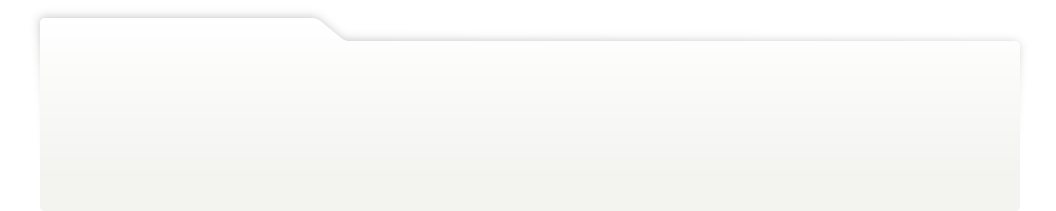
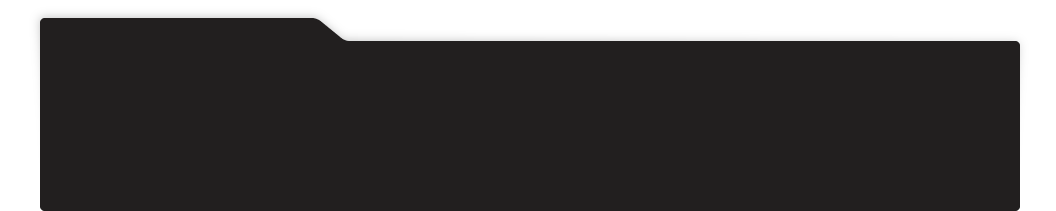
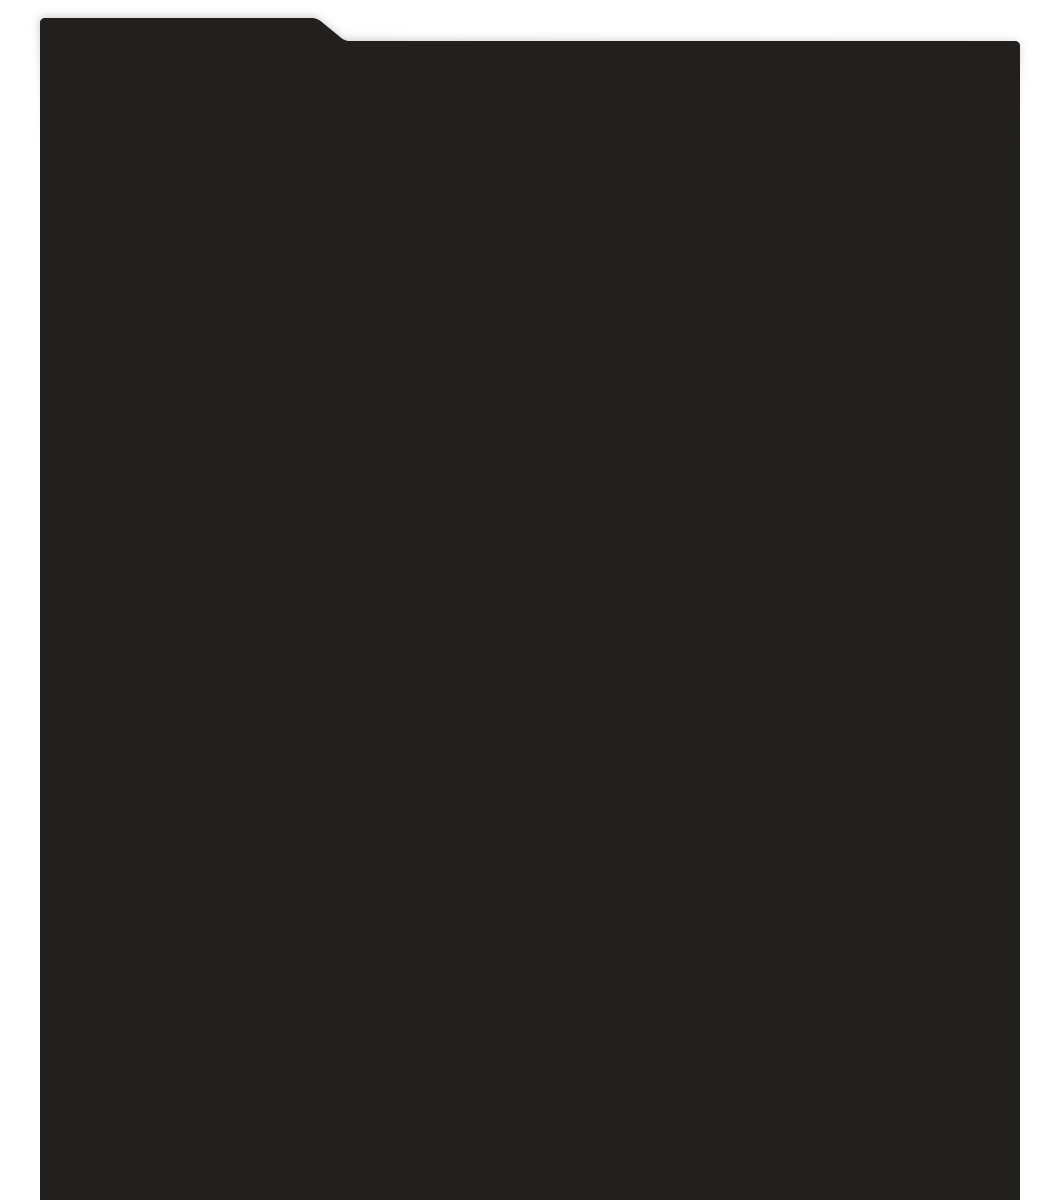
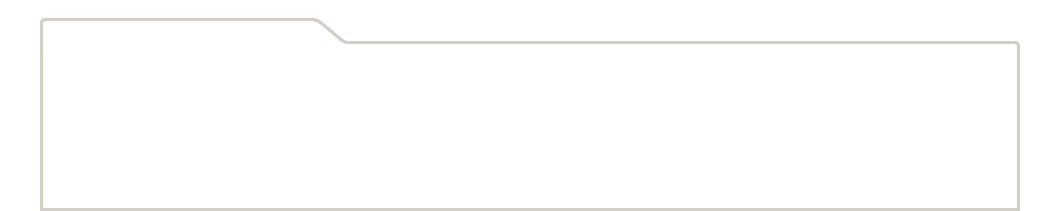
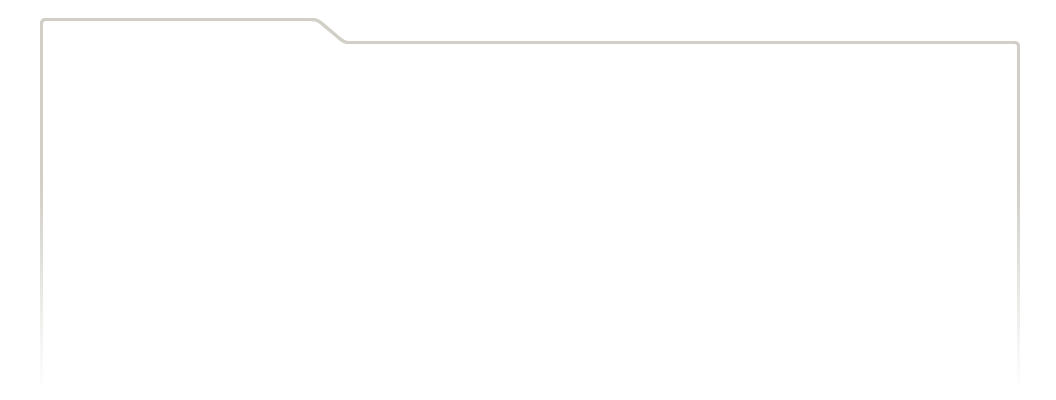
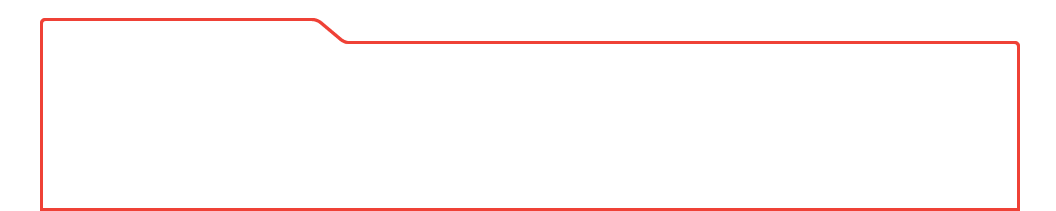
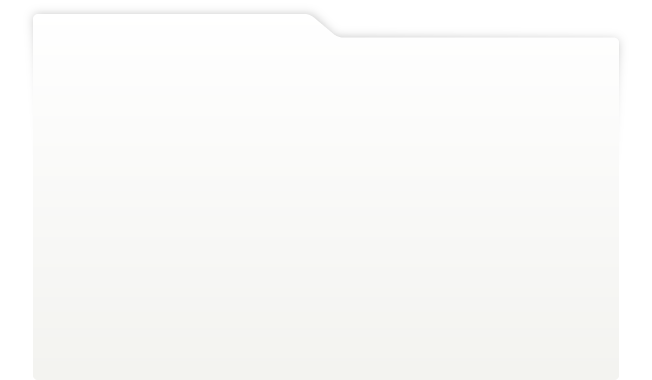
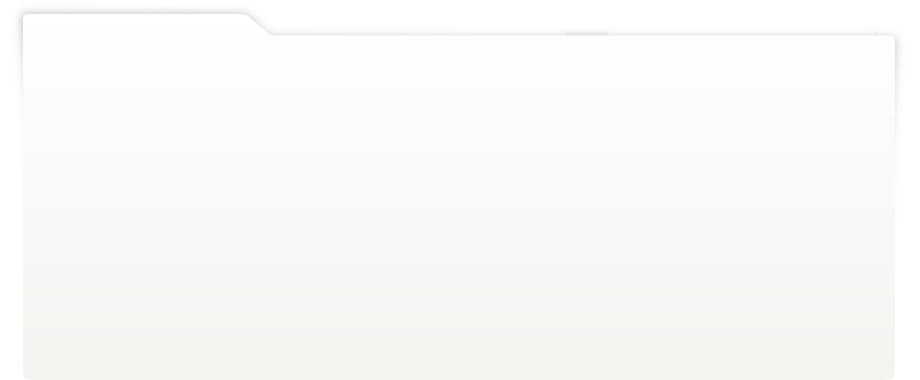
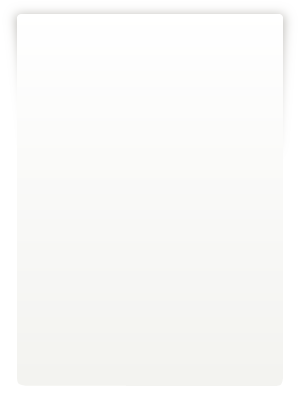
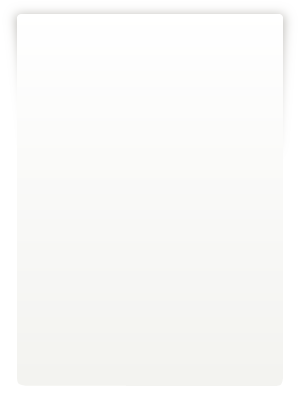
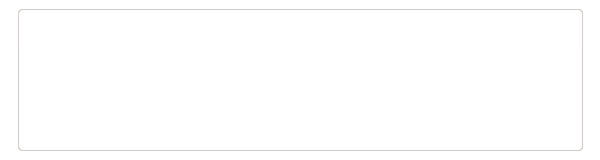
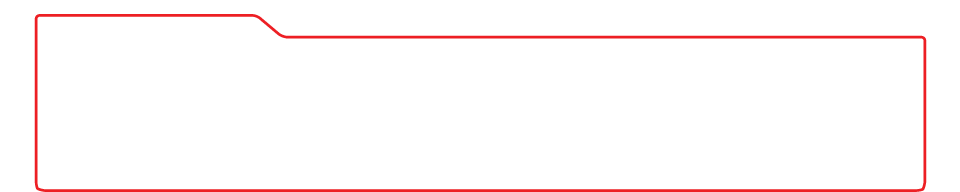
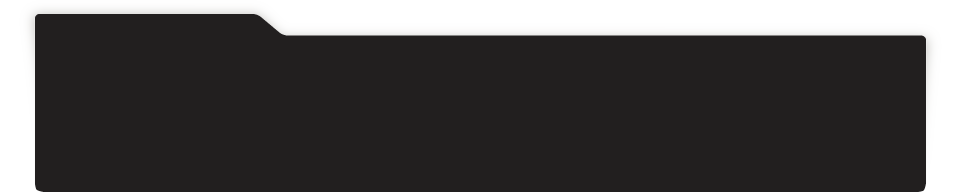
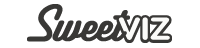
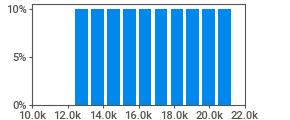
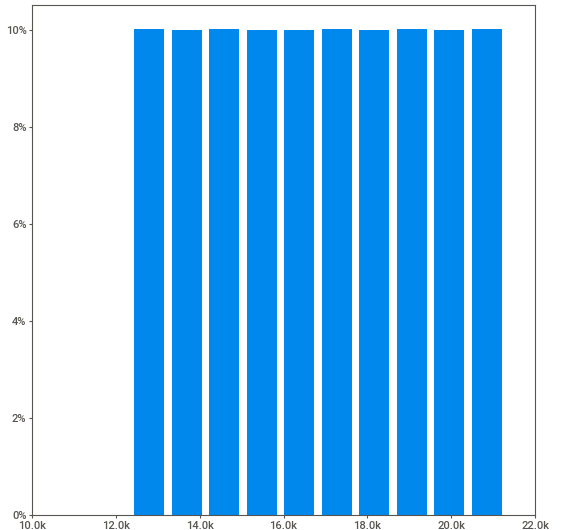
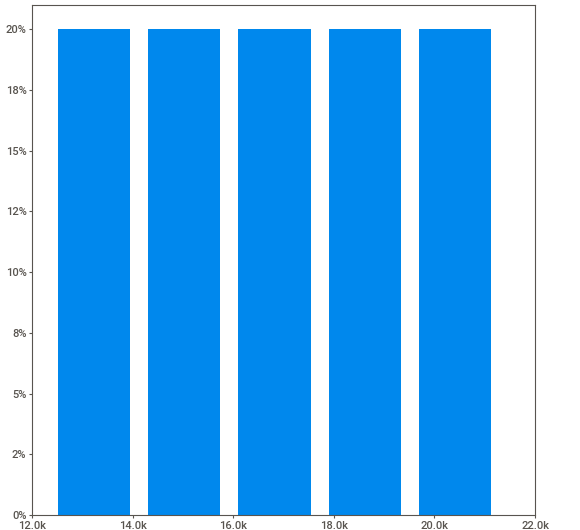
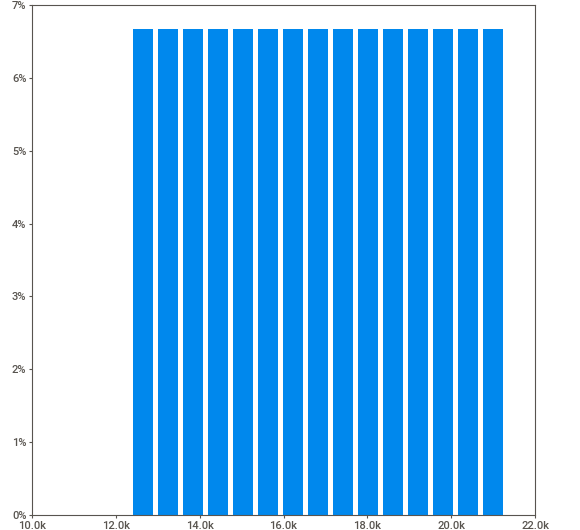
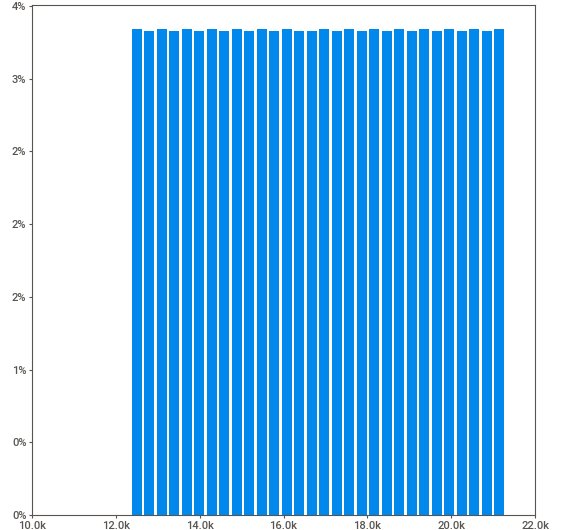
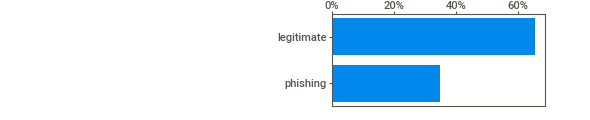
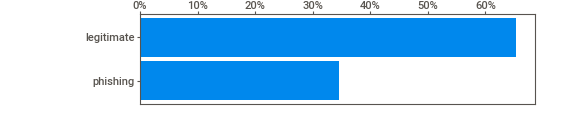
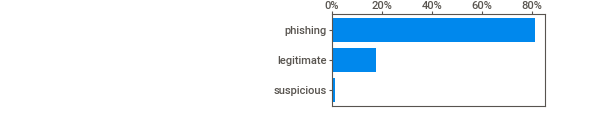
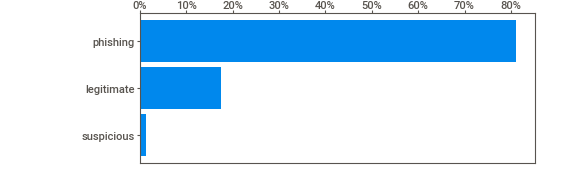
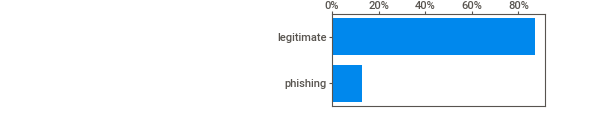
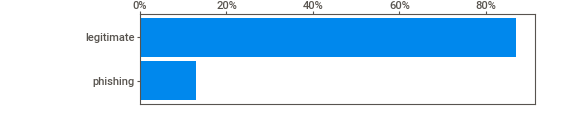
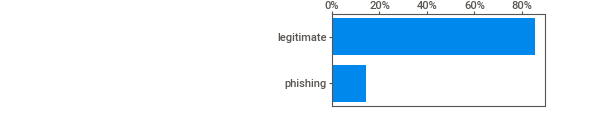
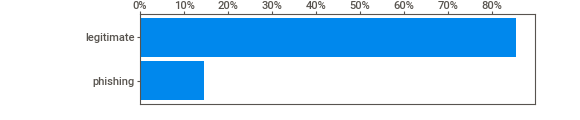
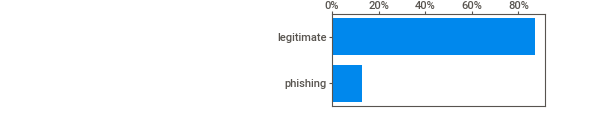
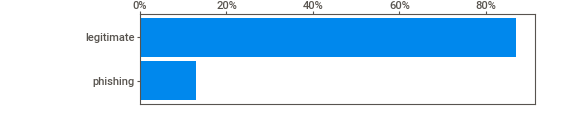
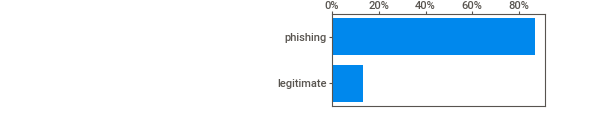
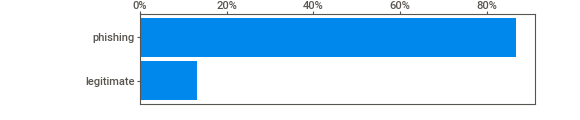
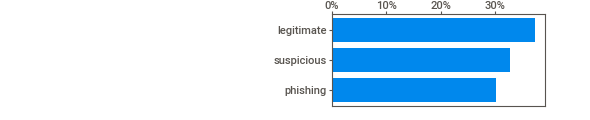
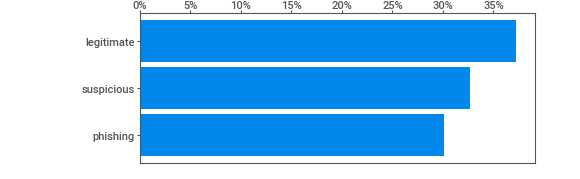
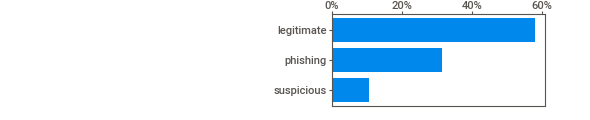
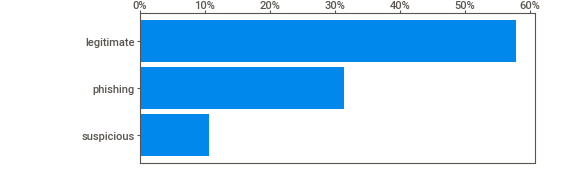
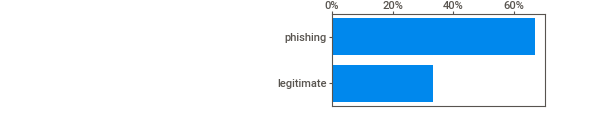
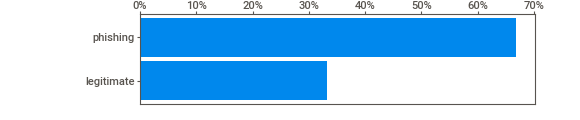
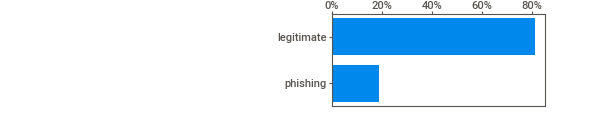
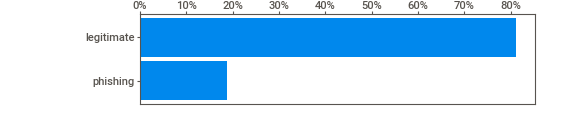
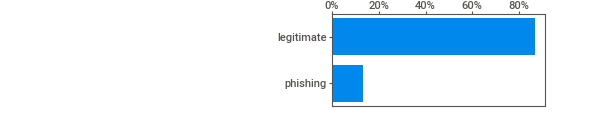
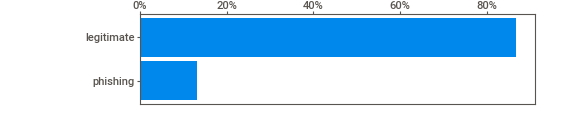
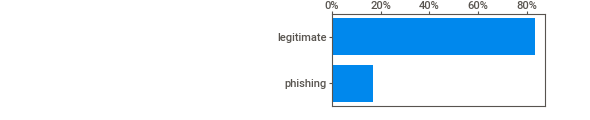
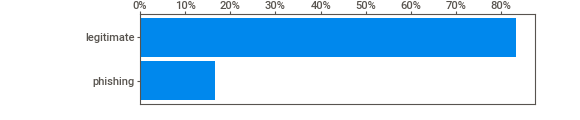
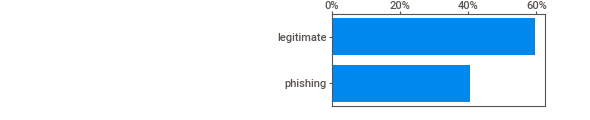
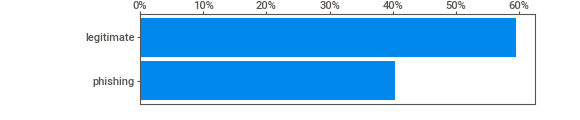
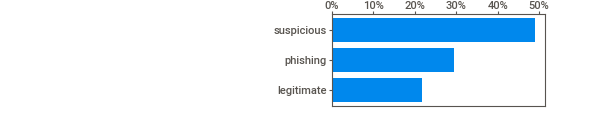
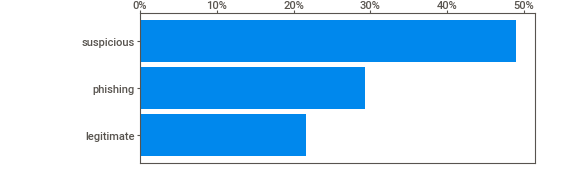
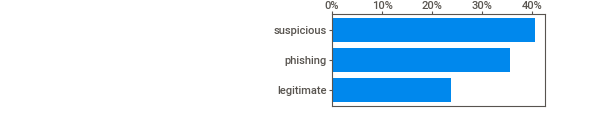
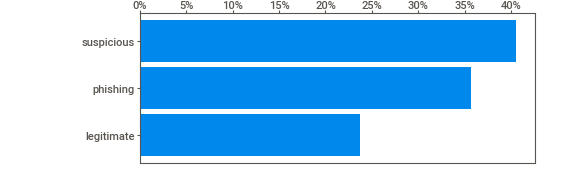
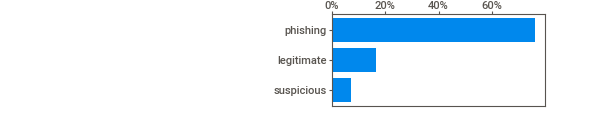
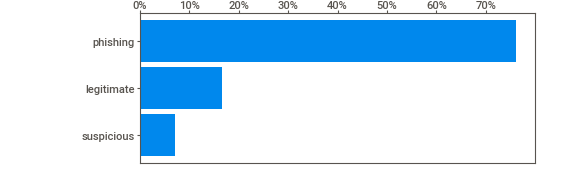
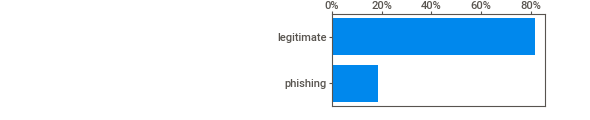
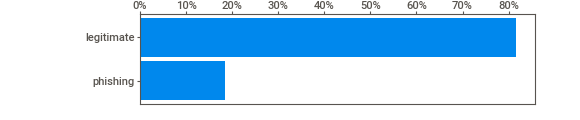
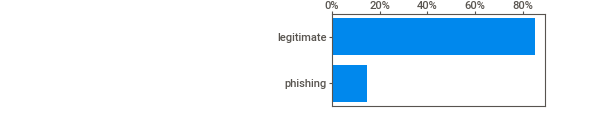
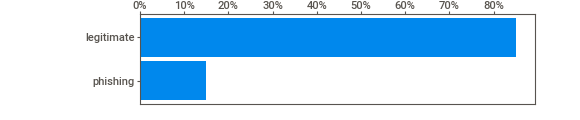
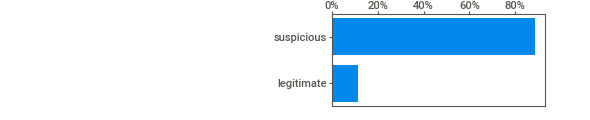
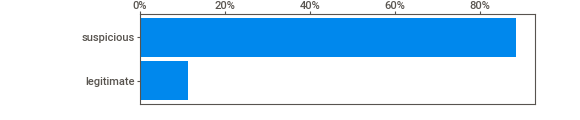
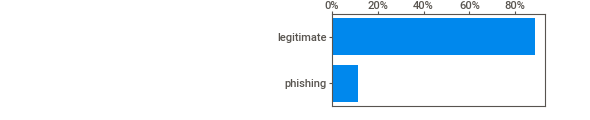
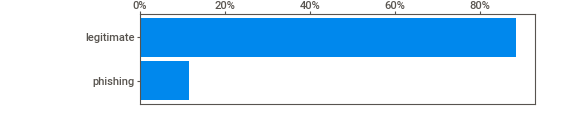
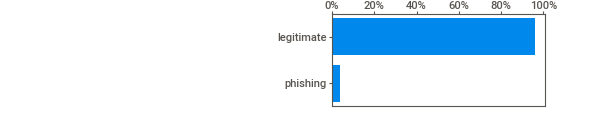
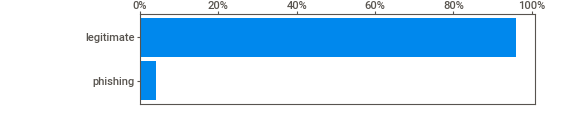
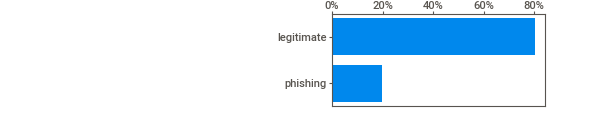
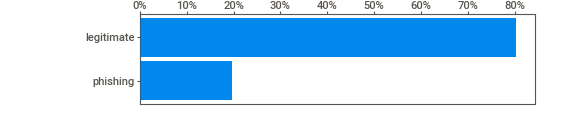
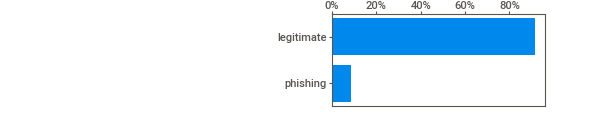
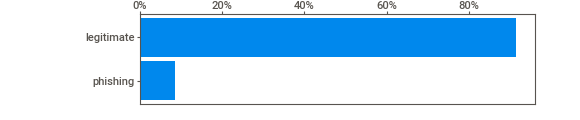
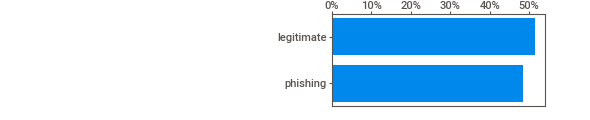
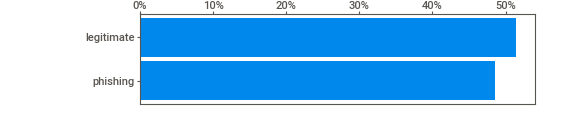
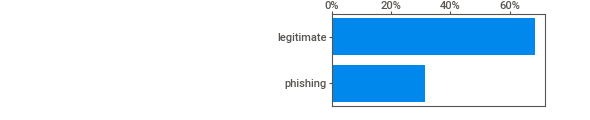
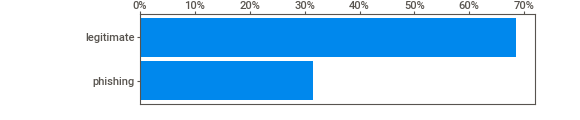
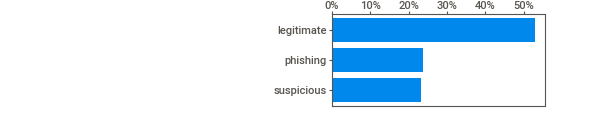
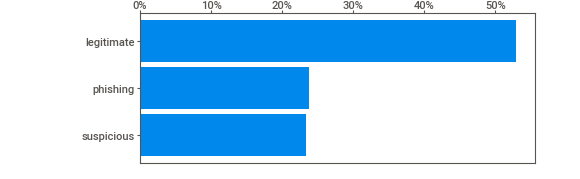
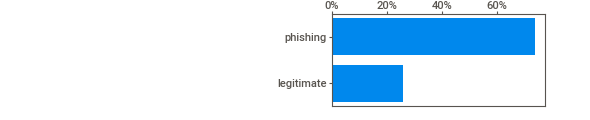
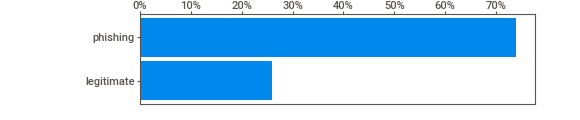
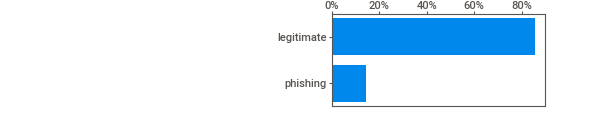
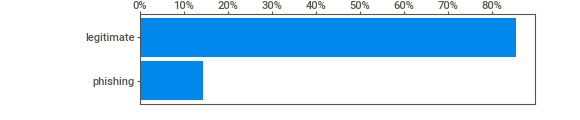
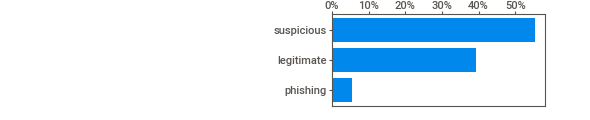
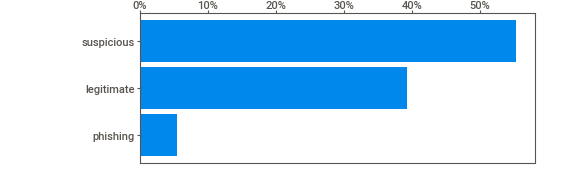
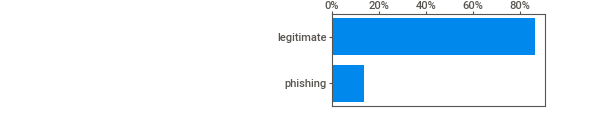
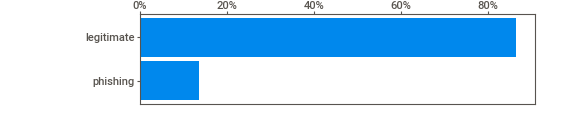
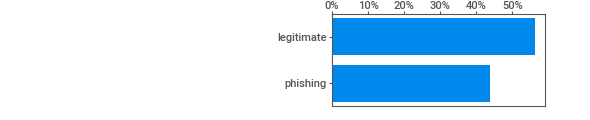
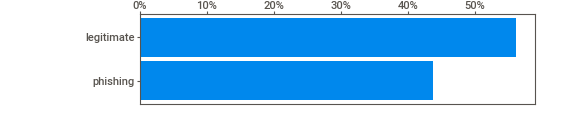
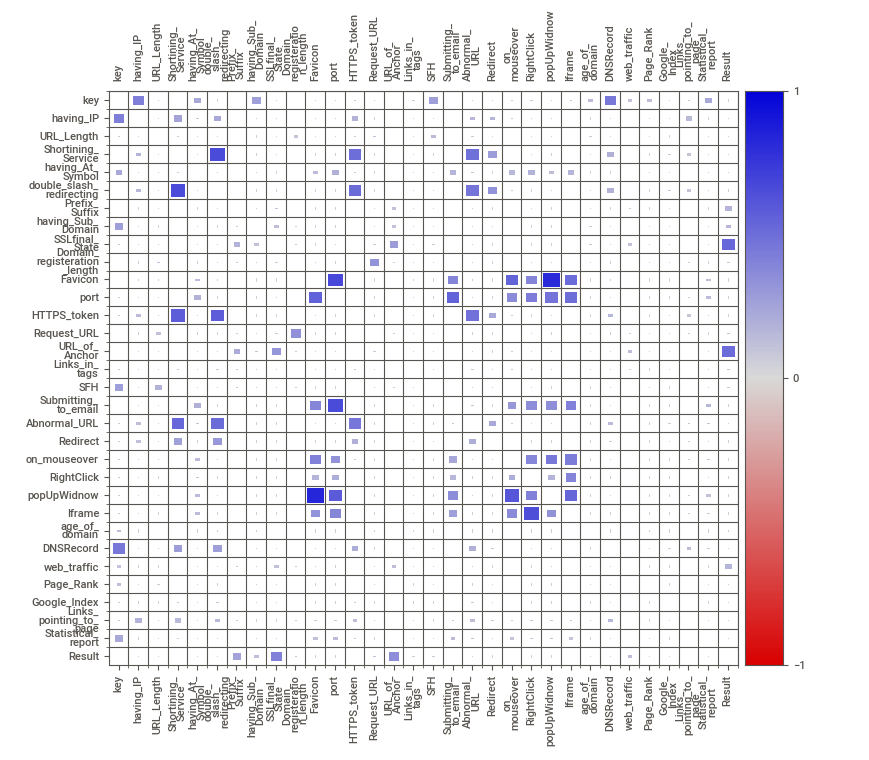
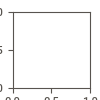

In [14]:
my_report = eda.analyze(dtrain.replace([-1, 0, 1], ["phishing", "suspicious", "legitimate"]))
my_report.show_notebook()

In [15]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## EDA (Exploratory Data Analysis)

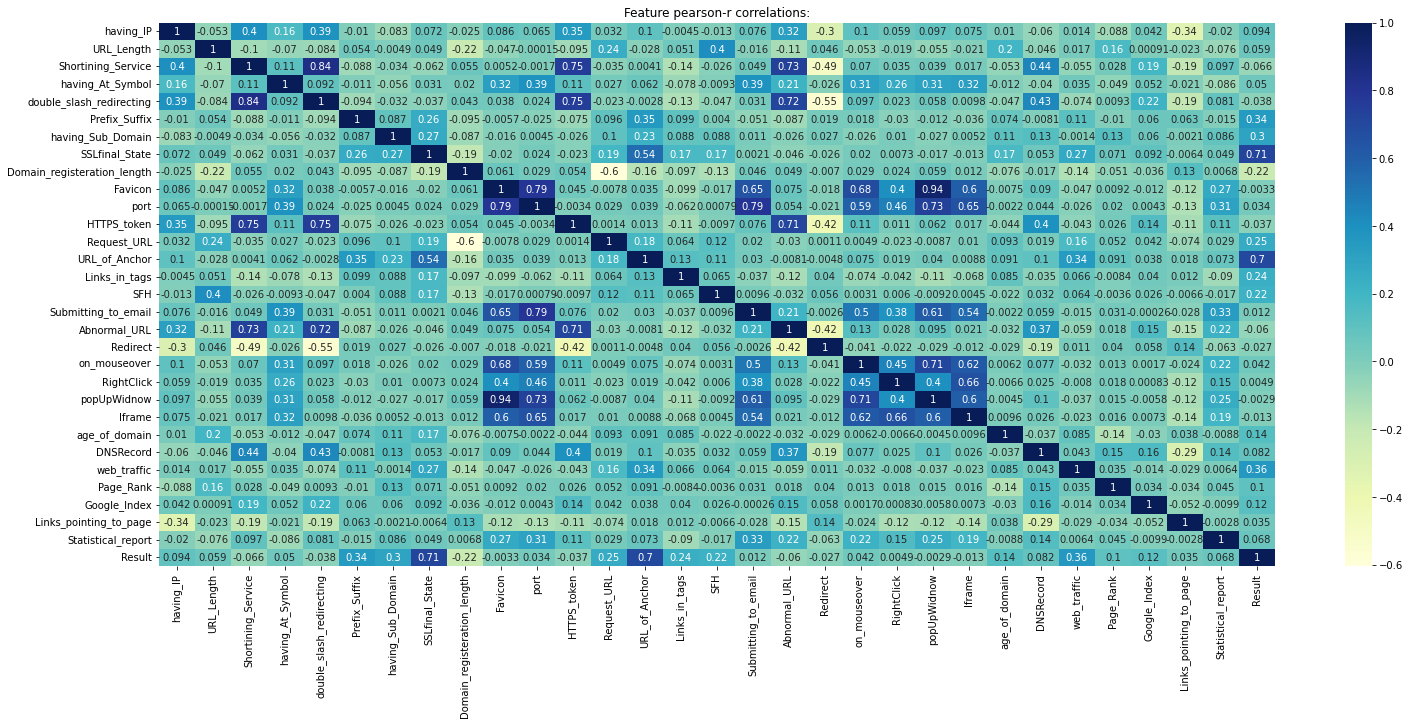

In [180]:
# correlation headmap
df = dtrain.drop(['key'],axis=1)
corr = df.corr()
plt.figure(figsize=[25, 10])
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Feature pearson-r correlations:")
plt.show()

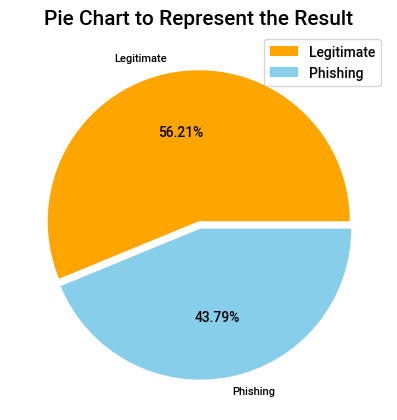

In [45]:
# a pie chart to represent the Result

size = [5034, 3921]
colors = ['orange', 'skyblue']
labels = "Legitimate","Phishing"
explode = [0, 0.05]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart to Represent the Result', fontsize = 15)
plt.legend()
plt.show()

## Train Test Split

In [5]:
x_dtrain = dtrain.drop(['key','Result'],axis=1)
y_dtrain = dtrain['Result']
x_dtrain.head(2)

,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_dtrain, y_dtrain, test_size=0.2,random_state=42)

## Models

### 1. AdaBoost Classifier

In [96]:
clf = AdaBoostClassifier(n_estimators=1000, random_state=0)
clf_fit = clf.fit(X_train, y_train)
clf_predictions = clf_fit.predict((X_test))

In [119]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, clf_predictions),4) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, clf_predictions))

# Model detailed classification report
target_names = ['Phishing', 'Normal']
print ("---------------")
print("Classification report\n\n", metrics.classification_report(y_test, clf_predictions,target_names =target_names))

Accuracy: 93.24 %
---------------
Confusion matrix
---------------
[[708  71]
 [ 50 962]]
---------------
Classification report

               precision    recall  f1-score   support

    Phishing       0.93      0.91      0.92       779
      Normal       0.93      0.95      0.94      1012

    accuracy                           0.93      1791
   macro avg       0.93      0.93      0.93      1791
weighted avg       0.93      0.93      0.93      1791



## Logistic Regression

In [115]:
Lr = LogisticRegression(solver='lbfgs',multi_class='auto',C=10,class_weight='balanced')
Lr.fit(X_train, y_train)
predsLr = Lr.predict(X_test)
accuracy_score(predsLr, y_test)

0.9296482412060302

In [120]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, predsLr),4) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, predsLr))

# Model detailed classification report
target_names = ['Phishing', 'Normal']
print ("---------------")
print("Classification report\n\n", metrics.classification_report(y_test, predsLr,target_names =target_names))

Accuracy: 92.96 %
---------------
Confusion matrix
---------------
[[716  63]
 [ 63 949]]
---------------
Classification report

               precision    recall  f1-score   support

    Phishing       0.92      0.92      0.92       779
      Normal       0.94      0.94      0.94      1012

    accuracy                           0.93      1791
   macro avg       0.93      0.93      0.93      1791
weighted avg       0.93      0.93      0.93      1791



## Decision Tree

In [129]:
dt = DecisionTreeClassifier(random_state=0,class_weight='balanced',max_features='auto',criterion='entropy')
dt.fit(X_train,y_train)
fit = dt.fit(X_train, y_train)
predictions = fit.predict((X_test))

In [130]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, predictions),4) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, predictions))

# Model detailed classification report
target_names = ['Phising', 'Normal']
print ("---------------")
print("Classification report\n\n", metrics.classification_report(y_test, predictions,target_names = target_names))

Accuracy: 95.81 %
---------------
Confusion matrix
---------------
[[727  52]
 [ 23 989]]
---------------
Classification report

               precision    recall  f1-score   support

     Phising       0.97      0.93      0.95       779
      Normal       0.95      0.98      0.96      1012

    accuracy                           0.96      1791
   macro avg       0.96      0.96      0.96      1791
weighted avg       0.96      0.96      0.96      1791



In [140]:
#parameter_grid = {'max_depth':[3, 4, 5, 6, 10,15,20,25,30],
#              'min_samples_leaf' : [5, 10, 15,20,25,30,40],
#              'min_samples_split' : [5,10, 20, 30,40]
#            }
#randomsearch = RandomizedSearchCV(estimator=dt, param_distributions=parameter_grid, n_iter=50, cv=5)
#randomsearch.fit(X_train, y_train)
#randomsearch.best_params_

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 15}

In [137]:
#parameter_grid = {'criterion':['gini', 'entropy'],
#              'max_depth':[3, 4, 5, 6, 10,15,20,25,30],
#              'min_samples_leaf' : [5, 10, 15,20,25,30,40],
#              'min_samples_split' : [5,10, 20, 30,40],
#              'max_features' : ['auto', 'log2'],
#            }
#randomsearch = RandomizedSearchCV(estimator=dt, param_distributions=parameter_grid, n_iter=50, cv=5)
#randomsearch.fit(X_train, y_train)
#randomsearch.best_params_

{'min_samples_split': 30,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'entropy'}

## Extra Tree Classifier

In [180]:
#et = ExtraTreesClassifier(n_estimators=300,criterion='gini',max_depth=20,class_weight='balanced',random_state=0,max_features='log2')
#97.38
et = ExtraTreesClassifier(n_estimators=200,criterion='gini',max_depth=20,class_weight='balanced',random_state=0,max_features='log2')
fit = et.fit(X_train, y_train)
predictions = fit.predict((X_test))

In [181]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, predictions),4) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, predictions))

# Model detailed classification report
target_names = ['Phising', 'Normal']
print ("---------------")
print("Classification report\n\n", metrics.classification_report(y_test, predictions,target_names = target_names))

Accuracy: 97.43 %
---------------
Confusion matrix
---------------
[[753  26]
 [ 20 992]]
---------------
Classification report

               precision    recall  f1-score   support

     Phising       0.97      0.97      0.97       779
      Normal       0.97      0.98      0.98      1012

    accuracy                           0.97      1791
   macro avg       0.97      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791



In [133]:
et1 = ExtraTreesClassifier(n_estimators=500,criterion='entropy',max_depth=20,class_weight='balanced',random_state=0,max_features='log2')
fit1 = et1.fit(X_train1, ytrain1)
predictions1 = fit1.predict((X_test1))
metrics.accuracy_score(ytest1, predictions1)

0.9743160245672808

## Random Forest CLassifier

In [155]:
rc1=RandomForestClassifier(n_estimators=300,criterion='gini',class_weight='balanced',max_depth=30,max_features='auto')
fit1 = rc1.fit(X_train1, ytrain1)
predictions1 = fit1.predict((X_test1))
metrics.accuracy_score(ytest1, predictions1)

0.9715242881072027

In [150]:
rc=RandomForestClassifier(n_estimators=400,criterion='gini',class_weight='balanced',max_depth=30,max_features='auto')
fit = rc.fit(X_train, y_train)
predictions = fit.predict((X_test))

In [197]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, predictions),4) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, predictions))

# Model detailed classification report
target_names = ['Phising', 'Normal']
print ("---------------")
print("Classification report\n\n", metrics.classification_report(y_test, predictions,target_names = target_names))

Accuracy: 97.1 %
---------------
Confusion matrix
---------------
[[746  33]
 [ 19 993]]
---------------
Classification report

               precision    recall  f1-score   support

     Phising       0.98      0.96      0.97       779
      Normal       0.97      0.98      0.97      1012

    accuracy                           0.97      1791
   macro avg       0.97      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791



## Support Vector Machine Classifier

In [14]:
svc = svm.SVC(kernel='rbf',gamma=0.1,C=1000,class_weight='balanced')
fit = svc.fit(X_train, y_train)
predictions = fit.predict((X_test))

In [15]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, predictions),4) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test, predictions))

# Model detailed classification report
target_names = ['Phising', 'Normal']
print ("---------------")
print("Classification report\n\n", metrics.classification_report(y_test, predictions,target_names = target_names))

Accuracy: 96.37 %
---------------
Confusion matrix
---------------
[[741  38]
 [ 27 985]]
---------------
Classification report

               precision    recall  f1-score   support

     Phising       0.96      0.95      0.96       779
      Normal       0.96      0.97      0.97      1012

    accuracy                           0.96      1791
   macro avg       0.96      0.96      0.96      1791
weighted avg       0.96      0.96      0.96      1791



### XGBoost

In [42]:
modelXg = xgboost.XGBClassifier(n_estimators=300,learning_rate=0.25,gamma=0.1)
modelXg.fit(X_train, y_train1)
predsXg = modelXg.predict(X_test)
accuracy_score(predsXg, y_test1)

[16:12:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9748743718592965

In [43]:
# Computing Model Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test1, predsXg),4) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(y_test1, predsXg))

# Model detailed classification report
target_names = ['Phishing', 'Normal']
print ("---------------")
print("Classification report\n\n", metrics.classification_report(y_test1, predsXg,target_names = target_names))

Accuracy: 97.49 %
---------------
Confusion matrix
---------------
[[995  17]
 [ 28 751]]
---------------
Classification report

               precision    recall  f1-score   support

    Phishing       0.97      0.98      0.98      1012
      Normal       0.98      0.96      0.97       779

    accuracy                           0.97      1791
   macro avg       0.98      0.97      0.97      1791
weighted avg       0.97      0.97      0.97      1791



<font color='green'>

#  Best Performing  Model is XGBoost 

</font>

## Hence performance after removing features with high correlation

In [4]:
# 'port','double_slash_redirecting','Prefix_Suffix','Favicon'
#x_dtrain1 = dtrain.drop(['key','Result','port','double_slash_redirecting','Prefix_Suffix','Favicon'],axis=1)
x_dtrain1 = dtrain.drop(['key','Result','popUpWidnow','Shortining_Service','Submitting_to_email'],axis=1)
y_dtrain1 = dtrain['Result']
x_dtrain1.head(2)

,having_IP,URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,...,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,-1,-1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,-1,0,1,-1,1,1,...,1,1,1,-1,-1,0,-1,1,1,1


In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_dtrain1, y_dtrain1, test_size=0.2,random_state=42)

In [6]:
en = LabelEncoder()

ytrain1 = en.fit_transform(y_train1)
ytest1 = en.fit_transform(y_test1)
ytrain1

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
#y_train1 = y_train.apply(lambda x: 1 if x is -1 else 0)
#y_test1 = y_test.apply(lambda x: 1 if x is -1 else 0)

In [7]:
modelXg1 = xgboost.XGBClassifier(n_estimators=300,learning_rate=0.35,gamma=0.00001,max_delta_step=2.0)
modelXg1.fit(X_train1, ytrain1)
predsXg1 = modelXg1.predict(X_test1)
round(accuracy_score(predsXg1, ytest1),4)

[18:16:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9754

In [30]:
# Computing Model Accuracy
print("============================== XGBoost Classifier ==============================")
print("Accuracy:",round(metrics.accuracy_score(ytest1, predsXg1),4) * 100, "%")
print ("---------------")

# Printing confusion matrix
print ("Confusion matrix")
print ("---------------")
print(metrics.confusion_matrix(ytest1, predsXg1))

# Model detailed classification report
target_names = ['Phishing', 'Normal']
print ("---------------")
print("Classification report\n\n", metrics.classification_report(ytest1, predsXg1,target_names = target_names))

============================== XGBoost Classifier ==============================
Accuracy: 97.54 %
---------------
Confusion matrix
---------------
[[748  31]
 [ 13 999]]
---------------
Classification report

               precision    recall  f1-score   support

    Phishing       0.98      0.96      0.97       779
      Normal       0.97      0.99      0.98      1012

    accuracy                           0.98      1791
   macro avg       0.98      0.97      0.97      1791
weighted avg       0.98      0.98      0.98      1791



In [21]:
cm = ConfusionMatrix(ytest1,predsXg1)
print(cm)

Predict   0         1         
Actual
0         748       31        

1         13        999       





Overall Statistics : 

95% CI                                                            (0.96826,0.9826)
ACC Macro                                                         0.97543
ARI                                                               0.90406
AUNP                                                              0.97368
AUNU                                                              0.97368
Bangdiwala B                                                      0.9525
Bennett S                                                         0.95087
CBA                                                               0.96505
CSI                                                               0.95009
Chi-Squared                                                       1616.66986
Chi-Squared DF                                                    1
Conditional Entropy                                 

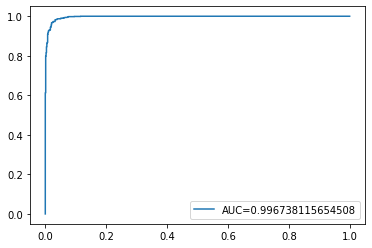

In [26]:
y_pred_proba = modelXg1.predict_proba(X_test1)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest1,  y_pred_proba)
auc = metrics.roc_auc_score(ytest1, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

### Feature Importance

In [157]:
modelXg1.feature_importances_

array([0.00918402, 0.00586319, 0.00428812, 0.0087921 , 0.23514006,
       0.0115345 , 0.34816015, 0.00863145, 0.0120832 , 0.00635063,
       0.01436823, 0.01168593, 0.18142651, 0.01591616, 0.0167644 ,
       0.00731466, 0.00725134, 0.00835739, 0.00480795, 0.007816  ,
       0.00791584, 0.01438409, 0.02151392, 0.0064048 , 0.00985911,
       0.01057757, 0.00360875], dtype=float32)

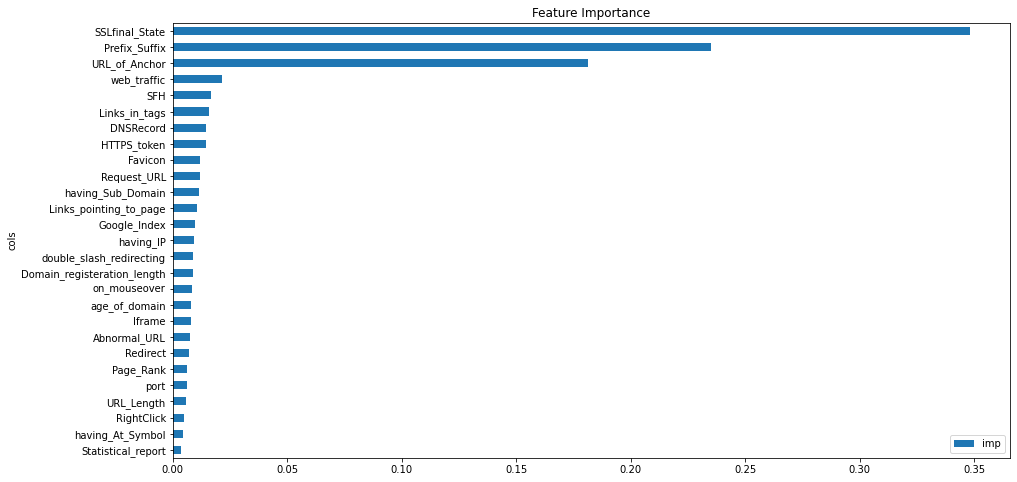

In [164]:
impdf = pd.DataFrame(dict(imp=modelXg1.feature_importances_, cols=x_dtrain1.columns)).sort_values(by="imp", ascending=True)
impdf.plot.barh(x='cols', title="Feature Importance", figsize=[15,8])
plt.show()

In [169]:
predsXg1

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [170]:
predsXg1a = en.inverse_transform(predsXg1)
predsXg1a

array([ 1,  1, -1, ...,  1, -1,  1], dtype=int64)

<font color = red>
    
#   Result
    
</font>

In [171]:
dtest.head(3)

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,21338,1,1,1,1,1,1,-1,1,-1,...,1,1,1,1,1,1,1,-1,0,1
1,21339,1,-1,1,1,1,-1,0,-1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,21340,1,-1,1,1,1,-1,0,0,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1


In [172]:
x_dtest = dtest.drop(['key','popUpWidnow','Shortining_Service','Submitting_to_email'],axis=1)
x_dtest.head(3)

,having_IP,URL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,...,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,1,1,1,1,1,-1,1,-1,1,1,...,1,1,1,1,1,1,1,-1,0,1
1,1,-1,1,1,-1,0,-1,1,1,1,...,1,1,1,-1,-1,0,-1,-1,0,1
2,1,-1,1,1,-1,0,0,-1,-1,-1,...,-1,-1,-1,1,-1,1,-1,1,1,-1


In [174]:
predsTest = modelXg1.predict(x_dtest)
predsTest

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [175]:
predsTest = en.inverse_transform(predsTest)
predsTest

array([ 1, -1, -1, ..., -1,  1,  1], dtype=int64)

In [178]:
submission = pd.DataFrame()
submission['key'] = dtest['key']
submission['Result'] = predsTest
submission.head(3)

,key,Result
0,21338,1
1,21339,-1
2,21340,-1


In [179]:
submission.to_csv('submission.csv',index=False)